# Homework 3
- Student: Aleksandra Kocot
 - [Git Hub page with the Homework questions](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/03-classification/homework.md)

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

#### Reading the data

In [2]:
columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
    'ocean_proximity'
]

In [3]:
df_raw = pd.read_csv("housing.csv", usecols=columns)

In [5]:
list(df_raw.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [6]:
df_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df_raw.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


### Data preparation

In [8]:
df_raw.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
total_bedrooms_median = df_raw.total_bedrooms.median()
total_bedrooms_median

435.0

In [12]:
df_raw.total_bedrooms = df_raw.total_bedrooms.fillna(total_bedrooms_median)

In [13]:
df_raw.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

##### New columns

In [14]:
df_raw["rooms_per_household"] = df_raw["total_rooms"] / df_raw["households"]
df_raw["bedrooms_per_room"] = df_raw["total_bedrooms"] / df_raw["total_rooms"]
df_raw["population_per_household"] = df_raw["population"] / df_raw["households"]

In [15]:
df_raw.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


## Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

Options:
- NEAR BAY
- <b><1H OCEAN</b>
- INLAND
- NEAR OCEAN

In [16]:
df_raw.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [17]:
df_raw.ocean_proximity.value_counts(normalize=True)

ocean_proximity
<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: proportion, dtype: float64

## Question 2
Create the correlation matrix for the numerical features of your train dataset.<br>
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.<br>
What are the two features that have the biggest correlation in this dataset?<br>
Options:
- <b>total_bedrooms and households</b>
- total_bedrooms and total_rooms
- population and households
- population_per_household and total_rooms

In [18]:
df_raw.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [19]:
df_corr = df_raw.drop(columns = ["ocean_proximity","median_house_value"]).corr()

In [20]:
df_corr.abs()[df_corr<1].max().sort_values(ascending=False)

total_bedrooms              0.974366
households                  0.974366
total_rooms                 0.927058
longitude                   0.924664
latitude                    0.924664
population                  0.907222
median_income               0.545298
bedrooms_per_room           0.545298
rooms_per_household         0.370308
housing_median_age          0.361262
population_per_household    0.069863
dtype: float64

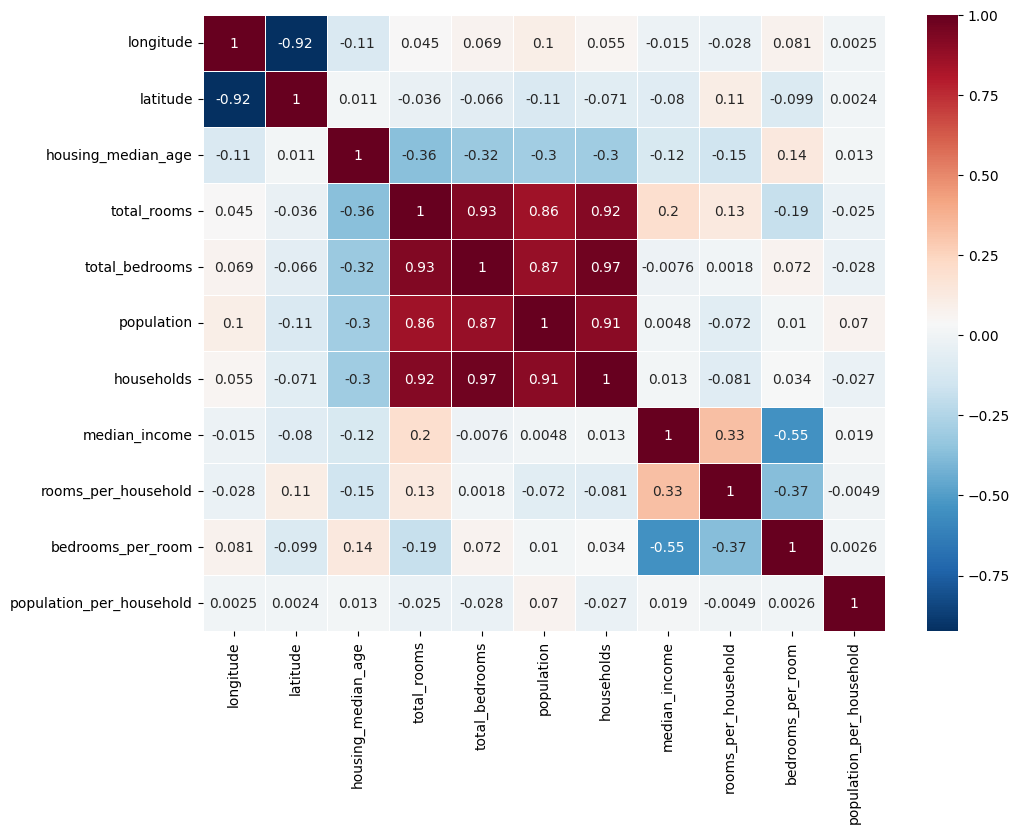

In [21]:
plt.figure(figsize=(11,8))
sns.heatmap(
    df_corr,
    annot=True,
    linewidths=.5, 
    cmap="RdBu_r"
    );

#### Make median_house_value binary
We need to turn the median_house_value variable from numeric into binary.<br>
Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.<br>

In [22]:
df = df_raw.copy()

In [23]:
df["above_average"] = (df["median_house_value"] > df["median_house_value"].mean()).astype(int)

#### Split the data
Split your data in train/val/test sets, with 60%/20%/20% distribution.<br>
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.<br>
Make sure that the target value (median_house_value) is not in your dataframe.

In [24]:
list(df.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household',
 'above_average']

In [25]:
df = df.drop(columns="median_house_value", axis=1)

In [26]:
df_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [27]:
df_train, df_val = train_test_split(df_full, test_size=0.25, random_state=42)

In [28]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
17244,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011,1
8817,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082,1
19686,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059,0
3545,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016,1
17019,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,-118.29,33.79,16.0,1867.0,571.0,951.0,498.0,3.3427,<1H OCEAN,3.748996,0.305838,1.909639,0
16339,-121.34,38.04,16.0,3295.0,565.0,2279.0,576.0,3.6083,INLAND,5.720486,0.171472,3.956597,0
14965,-116.99,32.74,18.0,3341.0,611.0,1952.0,602.0,3.9844,<1H OCEAN,5.549834,0.182879,3.242525,1
11117,-117.87,33.84,16.0,1545.0,354.0,730.0,350.0,4.5112,<1H OCEAN,4.414286,0.229126,2.085714,0


In [29]:
df_val

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
2071,-119.85,36.74,35.0,1191.0,190.0,537.0,182.0,3.5375,INLAND,6.543956,0.159530,2.950549,0
2612,-124.16,41.02,23.0,1672.0,385.0,1060.0,390.0,2.1726,NEAR OCEAN,4.287179,0.230263,2.717949,0
10838,-117.92,33.67,14.0,6224.0,1679.0,3148.0,1589.0,4.2071,<1H OCEAN,3.916929,0.269762,1.981120,1
4061,-118.45,34.15,10.0,1091.0,260.0,517.0,266.0,4.1727,<1H OCEAN,4.101504,0.238313,1.943609,1
10767,-117.90,33.63,28.0,2370.0,352.0,832.0,347.0,7.1148,<1H OCEAN,6.829971,0.148523,2.397695,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,-119.77,36.79,27.0,2258.0,427.0,1076.0,423.0,2.9937,INLAND,5.338061,0.189105,2.543735,0
16904,-122.35,37.58,30.0,5039.0,1564.0,2129.0,1536.0,3.3469,NEAR OCEAN,3.280599,0.310379,1.386068,1
18139,-122.01,37.34,31.0,3080.0,526.0,1493.0,582.0,6.3052,<1H OCEAN,5.292096,0.170779,2.565292,1
11471,-118.00,33.67,34.0,3712.0,667.0,1521.0,632.0,4.8125,<1H OCEAN,5.873418,0.179688,2.406646,1


In [30]:
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
20046,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,INLAND,4.192201,0.289037,3.877437,0
3024,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,INLAND,5.039384,0.147808,2.679795,0
15663,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,NEAR BAY,3.977155,0.113577,1.360332,1
20484,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,<1H OCEAN,6.163636,0.142576,3.444444,1
9814,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,NEAR OCEAN,5.492991,0.185028,2.483645,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,<1H OCEAN,7.002212,0.152291,2.988938,1
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,NEAR OCEAN,6.131915,0.204950,2.340426,1
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,<1H OCEAN,7.237676,0.130868,2.790493,1
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,INLAND,5.289030,0.185880,2.588608,0


In [31]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [32]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [33]:
del df_train["above_average"] 
del df_val["above_average"]
del df_test["above_average"] 

## Question 3
Calculate the mutual information score between above_average and ocean_proximity . Use the training set only.<br>
Round it to 2 decimals using round(score, 2)<br>
What is their mutual information score?<br>
Options:
- 0.26
- 0
- <b>0.10</b>
- 0.16

In [34]:
mi_score = mutual_info_score(y_train, df_train.ocean_proximity)

In [35]:
mi_score

0.10138385763624205

## Question 4
Now let's train a logistic regression<br>
Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.<br>
Fit the model on the training dataset.<br>
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:<br>
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)<br>
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.<br>
Options:
- 0.60
- 0.72
- <b>0.84</b>
- 0.95

#### One Hot Encoding

##### Using OneHotEncoder - to test it - below with DictVectorizer as in Lectures

In [32]:
enc = OneHotEncoder(handle_unknown='ignore')

In [33]:
df_train.ocean_proximity

0         <1H OCEAN
1        NEAR OCEAN
2            INLAND
3         <1H OCEAN
4        NEAR OCEAN
            ...    
12379     <1H OCEAN
12380        INLAND
12381     <1H OCEAN
12382     <1H OCEAN
12383     <1H OCEAN
Name: ocean_proximity, Length: 12384, dtype: object

In [36]:
enc.fit(df_train.ocean_proximity.values.reshape(-1, 1))

OneHotEncoder(handle_unknown='ignore')

In [38]:
enc.transform(df_train.ocean_proximity.values.reshape(-1, 1)).toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [34]:
enc.fit(df_train)

OneHotEncoder(handle_unknown='ignore')

In [36]:
ohe = enc.transform(df_train).toarray()

In [40]:
len(ohe[0])

57204

##### - OneHotEncoder encode all the variables - also those numeric.

#### Vectorizing

In [67]:
train_dict = df_train.to_dict(orient='records')

In [68]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [69]:
X_train[0]

array([ 2.59713701e-01,  3.74000000e+02,  3.90000000e+01,  3.44300000e+01,
       -1.19670000e+02,  2.36810000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.40400000e+03,
        3.75401070e+00,  3.92245989e+00,  3.81000000e+02,  1.46700000e+03])

In [70]:
len(X_train[0])

16

In [71]:
list(dv.get_feature_names_out())

['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

##### - DictVectorizer encode only vategorical variables and leave numeric ones as they are!

#### Training Logistic Regression

In [72]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(acc)
print(round(acc,2))

0.8362403100775194
0.84


## Question 5
Let's find the least useful feature using the feature elimination technique.<br>
Train a model with all these features (using the same parameters as in Q4).<br>
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.<br>
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.<br><br>
Which of following feature has the smallest difference?
- total_rooms <b>(?)</b>
- total_bedrooms
- population
- households
<br><br>Note: the difference doesn't have to be positive

In [55]:
features = df_train.columns
accuracies = {}

In [73]:
for f in features:
    df_train_ex = df_train.drop(columns=f)
    train_dict = df_train_ex.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    df_val_ex = df_val.drop(columns=f)
    val_dict = df_val_ex.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_pred = model.predict(X_val)
    
    accuracy = np.round(accuracy_score(y_val, y_pred),4)
    accuracies[f] = accuracy

In [75]:
(pd.Series(accuracies) - 0.8362).sort_values(ascending=False)

total_rooms                 0.0008
population_per_household    0.0005
total_bedrooms             -0.0004
rooms_per_household        -0.0007
bedrooms_per_room          -0.0014
latitude                   -0.0024
households                 -0.0031
housing_median_age         -0.0048
longitude                  -0.0050
population                 -0.0099
ocean_proximity            -0.0167
median_income              -0.0499
dtype: float64

## Question 6
For this question, we'll see how to use a linear regression model from Scikit-Learn<br>
We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.<br>
Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.<br>
This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]<br>
Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.<br>
If there are multiple options, select the smallest alpha.<br>
Options:
- <b>0</b>
- 0.01
- 0.1
- 1
- 10

In [37]:
df_full, df_test = train_test_split(df_raw, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [38]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

Note: We increase the max_iter because of the Warning:
- "The max_iter was reached which means the coef_ did not converge"
- However, this change increase the computation time from seconds to minutes.

In [60]:
rmses = {}
for a in [0, 0.01, 0.1, 1, 10]:
    print(f"Alpha: {a}")
    model = Ridge(alpha=a, solver="sag", max_iter=10000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_pred = model.predict(X_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(rmse)
    rmses[a] = np.round(rmse,3)

Alpha: 0
0.4831195630167116
Alpha: 0.01
0.48311956400986494
Alpha: 0.1
0.48311957344460654
Alpha: 1
0.4831196682887123
Alpha: 10
0.48312061522585537


In [61]:
pd.Series(rmses)

0.00     0.483
0.01     0.483
0.10     0.483
1.00     0.483
10.00    0.483
dtype: float64